In [1]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

sns.set()

In [2]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [3]:
cwd = os.getcwd()
data_path = os.path.sep.join([cwd, 'moore.csv'])
data = pd.read_csv(data_path, header=None).values

In [4]:
# get x's and y's for plotting and everything else
# reshaping into 2D for Pytorch
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

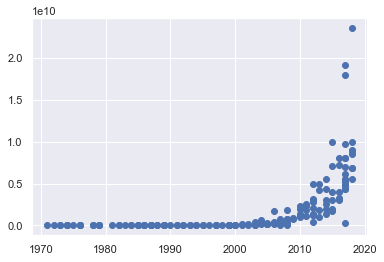

In [5]:
# plot the scatterplot
plt.scatter(x,y)

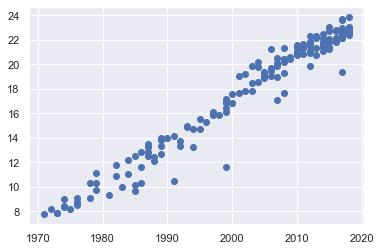

In [6]:
# lets take log of Y i.e log C to see how it varies with t

log_y = np.log(y)
plt.scatter(x=x, y=log_y)

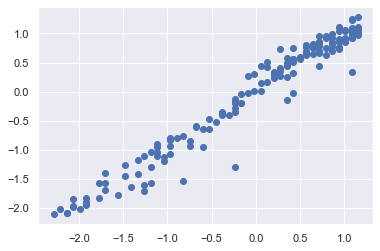

In [7]:
# standardise the x's and y's

mx = x.mean()
sx = x.std()

my = log_y.mean()
sy = log_y.std()

# standardise
X = (x - mx) / sx
Y = (log_y - my) / sy

plt.scatter(X, Y)

In [8]:
#preprocess for pytorch model

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [9]:
# model architecture
model = nn.Linear(in_features=1, out_features=1)

In [10]:
# criterion and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [11]:
# train the model
epochs = 100
avg_losses_per_batch = []

for i in range(epochs):
    # zero grad the optimizer
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    avg_losses_per_batch.append(loss.item())

    # backward step
    loss.backward()
    optimizer.step()
    
    print(f"[INFO] epoch: {i+1} / {epochs} with loss: {loss.item()}......")

[INFO] epoch: 1 / 100 with loss: 2.4933722019195557......
[INFO] epoch: 2 / 100 with loss: 2.396158218383789......
[INFO] epoch: 3 / 100 with loss: 2.237260341644287......
[INFO] epoch: 4 / 100 with loss: 2.0444440841674805......
[INFO] epoch: 5 / 100 with loss: 1.8379377126693726......
[INFO] epoch: 6 / 100 with loss: 1.6316099166870117......
[INFO] epoch: 7 / 100 with loss: 1.4343663454055786......
[INFO] epoch: 8 / 100 with loss: 1.2514421939849854......
[INFO] epoch: 9 / 100 with loss: 1.085473656654358......
[INFO] epoch: 10 / 100 with loss: 0.9373349547386169......
[INFO] epoch: 11 / 100 with loss: 0.8067582845687866......
[INFO] epoch: 12 / 100 with loss: 0.6927816867828369......
[INFO] epoch: 13 / 100 with loss: 0.5940616130828857......
[INFO] epoch: 14 / 100 with loss: 0.5090828537940979......
[INFO] epoch: 15 / 100 with loss: 0.4362964928150177......
[INFO] epoch: 16 / 100 with loss: 0.3742050230503082......
[INFO] epoch: 17 / 100 with loss: 0.32141152024269104......
[INFO] e

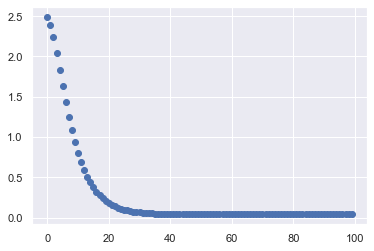

In [12]:
# plot the loss
plt.scatter(y = avg_losses_per_batch, x = range(epochs))

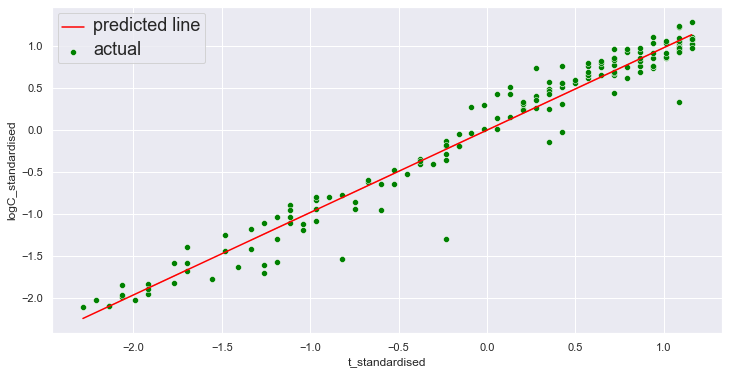

In [13]:
# plot the estimated model on overlaid on the data
sns.set(font_scale=1)
predicted_log_y = model(inputs).detach().numpy()
f, ax = plt.subplots(1, 1, figsize=(12, 6)) # type: Figure, Axes
sns.scatterplot(x=X.ravel(), y=Y.ravel(), ax=ax, color = "green", label = "actual")
sns.lineplot(x=X.ravel(), y=predicted_log_y.ravel(), ax=ax, color="red",label="predicted line")
ax.set_xlabel("t_standardised")
ax.set_ylabel("logC_standardised")
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [16]:
# get the trained weights of the model
w = model.weight.data.numpy() # slope
b = model.bias.data